# Holt-Winter's Models with Partition and Entire Data Sets

### Load required packages.

In [1]:
from pathlib import Path

import numpy as np 
import pandas as pd 
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing 
from statsmodels.tsa.stattools import acf
from dmba import regressionSummary
import warnings

import matplotlib.pylab as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


### Create template for graph layout.

In [2]:
# Create a template for graph layout with partitions for data set. 
def Graph_Layout_Partition_Data():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022')
    xtv = xtrain[1] + 0.7 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 1.0 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2013-12', 3300), xytext=('1991', 3300), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2018-12', 3300), xytext=('2014-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 3300), xytext=('2019-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2001', 3330, 'Training')
    ax.text('2015-1', 3330, 'Validation')
    ax.text('2019-7', 3330, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(1300, 3500)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')

# Create a template for graph layout with partitions for residuals. 
def Graph_Layout_Partition_Residuals():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022')
    xtv = xtrain[1] + 0.7 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 1.0 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2013-12', 600), xytext=('1991', 600), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2018-12', 600), xytext=('2014-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 600), xytext=('2019-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2001', 620, 'Training')
    ax.text('2015-1', 620, 'Validation')
    ax.text('2019-7', 620, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(-600, 700)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')


# Create a template for graph layout with entire dataset and 12 periods 
# into future. 
def Graph_Layout_Entire_Data():
    # Determine coordinates for drawing vertical lines and horizontal 
    # arrows on the chart.
    one_month = pd.Timedelta('31 days')
    xridership = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
    xfuture = (max(ridership_ts.index) + one_month, '2022')
    xvf = xridership[1] + 0.7 * (xfuture[0] - xridership[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2018-12', 3300), xytext=('1991', 3300), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 3300), xytext=('2019-2', 3300), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2005', 3330, 'Training')
    ax.text('2019-7', 3330, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(1300, 3500)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')
    

# Create a template for graph layout with entire data set for residuals. 
def Graph_Layout_Entire_Data_Residuals():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xridership = (min(ridership_ts.index), max(ridership_ts.index) - one_month)
    xfuture = (max(ridership_ts.index) + one_month, '2022')
    xvf = xridership[1] + 0.7 * (xfuture[0] - xridership[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate('', xy=('2018-12', 600), xytext=('1991', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate('', xy=('2021-12', 600), xytext=('2019-2', 600), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2005', 620, 'Training')
    ax.text('2019-7', 620, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('1990', '2022')
    ax.set_ylim(-600, 700)
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')

### Create measures of forecast accuracy.

In [3]:
# Create forcast accuracy measures.
def Forecast_Accuracy(actual, forecast):
    
    # ME - mean error
    me = round(np.mean(actual - forecast),3) 
    
    # RMSE - root mean square error (RMSE)
    rmse = round((np.mean((actual - forecast)**2)**.5),3)  
   
    # MAE - mean absolute error
    mae = round(np.mean(np.abs(actual - forecast)),3)   
   
    # MPE - mean percentage error,%
    mpe = round(((np.mean((actual - forecast)/actual))*100),3) 
    
    # MAPE - mean absolute percentage error, %
    mape = round(((np.mean(np.abs((actual - forecast)/actual)))*100),3) 
    
    # Ignore unnecessary future warnings on ACF1. 
    warnings.filterwarnings('ignore')
   
    # ACF1 - autocorrelation of errors at lag 1
    acf1 = round((acf(actual - forecast)[1]),3)                 
    
    return({'ME':me, 'RMSE':rmse, 'MAE':mae, 
            'MPE':mpe, 'MAPE':mape, 'ACF1':acf1})

### Create time series data set.

In [4]:
# Create Amtrak data frame.
Amtrak_data = pd.read_csv('Amtrak_comp.csv')

# Display the first 5 records of Amtrak data set.

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month)

# Convert data set to time series  data set. Name is used 
# to label the data.
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                index=Amtrak_data.Date, name='Ridership')

# Define Amtrak time series frequency as month 'MS'. 
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq = 'MS')

# Display first 5 records of Amtrak time series data.
ridership_ts.head()

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
Freq: MS, Name: Ridership, dtype: float64

### Simple exponential smoothing (SES) with partitioned data, alpha = 0.2.

In [6]:
# Create data partitioning for Ridership data.
# Define the numbers of months in the training and validation data sets,
# nTrain and nValid, respectively and create data partition, train_ts
# and valid_ts.
nValid = 60
nTrain = len(ridership_ts) - nValid
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]

In [7]:
# Create simple exponentail smoothing for Ridership data. 
# Use SimpleExpSmoothing()function with alpha = 0.2 (no trend 
# and no seasonality) to fit SES over the training data.
ses_orig = SimpleExpSmoothing(train_ts, 
           initialization_method='estimated').fit(smoothing_level=0.2, 
           optimized=False)

# Show the SES parameters.
print('SES Parameters')
print (ses_orig.params)

# Display SES fitted values for training data.
print(' ')
print('Fitted SES Values for Training Data, alpha=0.2')
print(ses_orig.fittedvalues)

# Use forecast() function to make predictions using this SES model 
# and validation period (nValid). Show predictions in tabular format.
ses_orig_pred = round(ses_orig.forecast(nValid), 3)
print(' ')
print('SES Forecast for Validation Data, alpha=0.2')
print(ses_orig_pred.head())
print(ses_orig_pred.tail())

SES Parameters
{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 1807.681399999999, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted SES Values for Training Data, alpha=0.2
Date
1991-01-01    1807.681400
1991-02-01    1787.928520
1991-03-01    1754.460016
1991-04-01    1798.111013
1991-05-01    1800.821810
                 ...     
2013-08-01    2706.568544
2013-09-01    2735.650635
2013-10-01    2676.551108
2013-11-01    2666.404887
2013-12-01    2643.264709
Freq: MS, Length: 276, dtype: float64
 
SES Forecast for Validation Data, alpha=0.2
2014-01-01    2656.982
2014-02-01    2656.982
2014-03-01    2656.982
2014-04-01    2656.982
2014-05-01    2656.982
Freq: MS, dtype: float64
2018-08-01    2656.982
2018-09-01    2656.982
2018-10-01    2656.982
2018-11-01    2656.982
2018-12-01    2656.982
Freq: MS, dtype: float64


### Holt's exponential smoothing with partitioned data.

In [8]:
# Use Holt()function for the additive model with alpha = 0.1 
# and beta = 0.1 (no seasonality) to fit Holt's model 
# over the training data.
h_AAN = ExponentialSmoothing(train_ts, trend='add',
        initialization_method='estimated').fit(smoothing_level=0.1, 
        smoothing_trend=0.1)

# Show the Holt't model parameters.
print("Holt's Model Parameters")
print (h_AAN.params)

# Display Holt's fitted values for training data.
print(' ')
print("Fitted Holt's Values for Training Data, Alpha=0.1 & Beta=0.1")
print(h_AAN.fittedvalues)

# Use forecast() function to make predictions using this Holt's model 
# and validation period (nValid). Show predictions in tabular format.
h_AAN_pred = round(h_AAN.forecast(nValid), 3)
print(' ')
print("Holt's Forecast for Validation Data, Alpha=0.1 & Beta=0.1")
print(h_AAN_pred)

Holt's Model Parameters
{'smoothing_level': 0.1, 'smoothing_trend': 0.1, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1804.8559472113045, 'initial_trend': 1.4070857531112388, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted Holt's Values for Training Data, Alpha=0.1 & Beta=0.1
Date
1991-01-01    1806.263033
1991-02-01    1796.962055
1991-03-01    1777.994314
1991-04-01    1798.083455
1991-05-01    1800.194496
                 ...     
2013-08-01    2702.673737
2013-09-01    2726.098044
2013-10-01    2703.137870
2013-11-01    2700.267234
2013-12-01    2688.676430
Freq: MS, Length: 276, dtype: float64
 
Holt's Forecast for Validation Data, Alpha=0.1 & Beta=0.1
2014-01-01    2694.591
2014-02-01    2698.188
2014-03-01    2701.786
2014-04-01    2705.383
2014-05-01    2708.980
2014-06-01    2712.577
2014-07-01    2716.175
2014-08-01    2719.772
2014-09-01    2723.369
2014-10-01    2726.967
2014-11-01    2730.

In [9]:
# Holt's model with optimal smoothing parameters. 
# Use Holt()function for additive model without alpha and 
# beta values to fit optimal Holt's model over the training 
# data (no specific parameters defined in the fit() function).
# h_AAN_opt = Holt(train_ts).fit()
h_AAN_opt = ExponentialSmoothing(train_ts, trend='add',
            initialization_method='estimated').fit(optimized=True)

# Show the Holt't model parameters.
print("Holt's Model Parameters")
print (h_AAN_opt.params)

# Print Holt's fitted values for training.
print(' ')
print("Fitted Holt's Values for Training Data with Optimal Smoothing Parameters")
print(h_AAN_opt.fittedvalues)

# Use forecast() function to make predictions using this Holt's model 
# and validation period (nValid). Show predictions in tabular format.
h_AAN_opt_pred = round(h_AAN_opt.forecast(nValid), 3)
print(' ')
print("Holt's Forecast for Validation Data with Optimal Smoothing Parameters")
print(h_AAN_opt_pred)

Holt's Model Parameters
{'smoothing_level': 0.5232856810621936, 'smoothing_trend': 9.9896107522869e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1807.5729046773213, 'initial_trend': 3.1924980727185672, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted Holt's Values for Training Data with Optimal Smoothing Parameters
Date
1991-01-01    1810.765403
1991-02-01    1760.656766
1991-03-01    1690.539592
1991-04-01    1841.392545
1991-05-01    1829.029595
                 ...     
2013-08-01    2845.046946
2013-09-01    2851.884704
2013-10-01    2639.620189
2013-11-01    2635.586817
2013-12-01    2594.352486
Freq: MS, Length: 276, dtype: float64
 
Holt's Forecast for Validation Data with Optimal Smoothing Parameters
2014-01-01    2659.028
2014-02-01    2662.217
2014-03-01    2665.407
2014-04-01    2668.597
2014-05-01    2671.787
2014-06-01    2674.976
2014-07-01    2678.166
2014-08-01    2681.356
2014-09-01

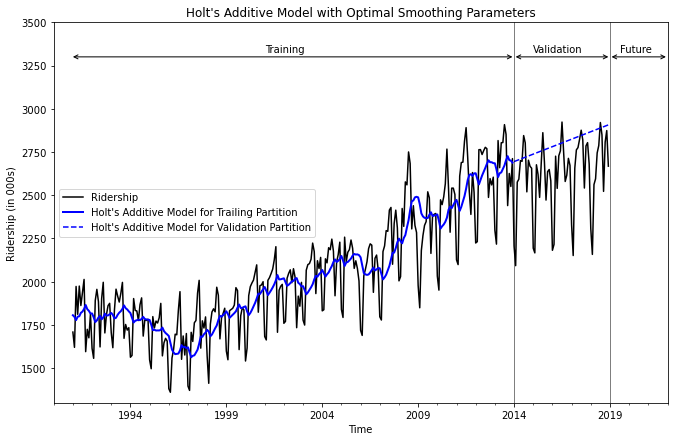

In [13]:
# Plot Holt's model predictions with optimal smoothing parameters..

# Plot Ridership data set.
ax = ridership_ts.plot(color='black', linewidth=1.5, figsize=(11,7))

# Plot HW fitted values and forecast for training and valiation sets.
h_AAN.fittedvalues.plot(ax = ax, color="blue", linewidth=2)
h_AAN_pred.plot(ax = ax, color="blue", style='--', linewidth=1.5)

# Determine coordinates for drawing vertical lines and horizontal 
# arrows and on the chart.
Graph_Layout_Partition_Data()

# Create legend and title for the chart.
ax.legend(['Ridership', 
           'Holt\'s Additive Model for Trailing Partition',
           'Holt\'s Additive Model for Validation Partition'],
           loc = 'center left')
plt.title('Holt\'s Additive Model with Optimal Smoothing Parameters')

plt.show()

### Holt-Winter's (HW) exponentail smoothing with partitioned data. Optimal parameters for alpha, beta, and gamma.

In [14]:
# Create Holt-Winter's (HW) exponential smoothing for 
# partitioned data.
# Use ExponentialSmoothing() for additive level (default), 
# trend, & seasonality.
# Use optimal alpha, beta, & gamma to fit HW over the 
# training period(no specific parameters defined in the 
# fit() function.)
hw_AAA = ExponentialSmoothing(train_ts, 
        trend='add', seasonal='add', seasonal_periods=12,
        initialization_method='estimated').fit(optimized=True)

# May also apply Box-Cox transformation, use_boxcox=True. 
# It is used to separate the time series into trend, seasonal 
# part, and remainder.

# Show the HW model parameters.
print("Holt-Winter's Model Parameters")
print (hw_AAA.params)

# Display HW fitted values for training data partition.
print(' ')
print("Fitted Holt-Winter's Values for Training Data with Optimal Smoothing Parameters")
print(hw_AAA.fittedvalues)

# Use forecast() function to make predictions using this 
# HW model and validation period (nValid). 
# Show predictions in tabular format.
hw_AAA_pred = round(hw_AAA.forecast(nValid), 3)
print(' ')
print("Holt-Winter's Forecast for Validation Data with Optimal Smoothing Parameters")
print(hw_AAA_pred)

Holt-Winter's Model Parameters
{'smoothing_level': 0.5, 'smoothing_trend': 0.025, 'smoothing_seasonal': 0.225, 'damping_trend': nan, 'initial_level': 1806.790499999999, 'initial_trend': -3.507428030302922, 'initial_seasons': array([-171.78359809, -215.13742101,   82.15332899,   95.94920399,
         78.16457899,  -10.89094184,  113.77657899,  184.00286024,
       -126.57334809,  -21.86867101,  -27.10178559,   19.30921441]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted Holt-Winter's Values for Training Data with Optimal Smoothing Parameters
Date
1991-01-01    1631.499474
1991-02-01    1624.314705
1991-03-01    1917.154785
1991-04-01    1956.838952
1991-05-01    1862.760862
                 ...     
2013-08-01    2816.336338
2013-09-01    2562.280986
2013-10-01    2615.081703
2013-11-01    2669.714794
2013-12-01    2582.876178
Freq: MS, Length: 276, dtype: float64
 
Holt-Winter's Forecast for Validation Data with Optimal Smoothing Parameters
2014-01-01    2333.494
2

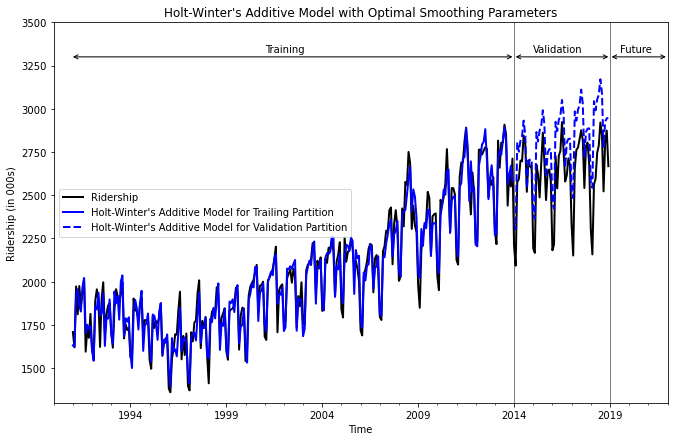

In [16]:
# Plot HW predictions for partitioned data with additive trend and 
# seasonality options, and optimal smoothing parameters.

# Plot Ridership data set.
ax = ridership_ts.plot(color='black', linewidth=2, figsize=(11,7))

# Plot HW fitted values and forecast for training and valiation sets.
hw_AAA.fittedvalues.plot(ax = ax, color="blue", linewidth=2)
hw_AAA_pred.plot(ax = ax, color="blue", style='--', linewidth=2)

# Determine coordinates for drawing vertical lines and horizontal 
# arrows and on the chart.
Graph_Layout_Partition_Data()

# Create legend and title for the chart.
ax.legend(['Ridership', 
           'Holt-Winter\'s Additive Model for Trailing Partition',
           'Holt-Winter\'s Additive Model for Validation Partition'],
        loc = 'center left')
plt.title('Holt-Winter\'s Additive Model with Optimal Smoothing Parameters')

plt.show()

### Holt-Winter's (HW) exponentail smoothing with partitioned data. Mixed trend and seasonality options. Optimal parameters for alpha, beta, and and gamma.


In [34]:

# Create Holt-Winter's (HW) exponential smoothing for 
# partitioned data.
# Use ExponentialSmoothing() for mixed trend 
# & seasonality options, i.e.: additive trend (trend='add')
# & multiplicative seasonality (seasonal='mul').
# Use optimal alpha, beta, & gamma to fit HW over the 
# training period.
hw_AMM = ExponentialSmoothing(train_ts, 
         trend='add', seasonal='mul', seasonal_periods=12, 
         initialization_method='estimated').fit(optimized=True)
# May also apply Box-Cox transformation, use_boxcox=True. 
# It is used to separate the time series into trend, seasonal 
# part, and remainder.

# Show the HW model parameters.
print("Holt-Winter's Model Parameters")
print (hw_AMM.params)

# Display HW fitted values for training data partition.
print(' ')
print("Fitted Holt-Winter's Values for Training Data with Optimal Smoothing Parameters")
print(hw_AMM.fittedvalues)

# Use forecast() function to make predictions using this HW model 
# and validation period (nValid). Show predictions in tabular format.
hw_AMM_pred = round(hw_AMM.forecast(nValid), 3)
print(' ')
print("Holt-Winter's Forecast for Validation Data with Optimal Smoothing Parameters")
print(hw_AMM_pred)


Holt-Winter's Model Parameters
{'smoothing_level': 0.49998669531747825, 'smoothing_trend': 0.0250122525701301, 'smoothing_seasonal': 0.17501339244700664, 'damping_trend': nan, 'initial_level': 1806.7716068103052, 'initial_trend': -3.5177951532509577, 'initial_seasons': array([0.96152554, 0.93354506, 1.12524291, 1.11882608, 1.14669247,
       1.09982002, 1.1582763 , 1.20216241, 1.0103717 , 1.08010838,
       1.06875733, 1.08865344]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted Holt-Winter's Values for Training Data with Optimal Smoothing Parameters
Date
1991-01-01    1733.874597
1991-02-01    1667.716296
1991-03-01    1976.734363
1991-04-01    1958.408305
1991-05-01    1924.926801
                 ...     
2013-08-01    2837.627168
2013-09-01    2531.735834
2013-10-01    2622.358753
2013-11-01    2660.975591
2013-12-01    2576.747480
Freq: MS, Length: 276, dtype: float64
 
Holt-Winter's Forecast for Validation Data with Optimal Smoothing Parameters
2014-01-01    2

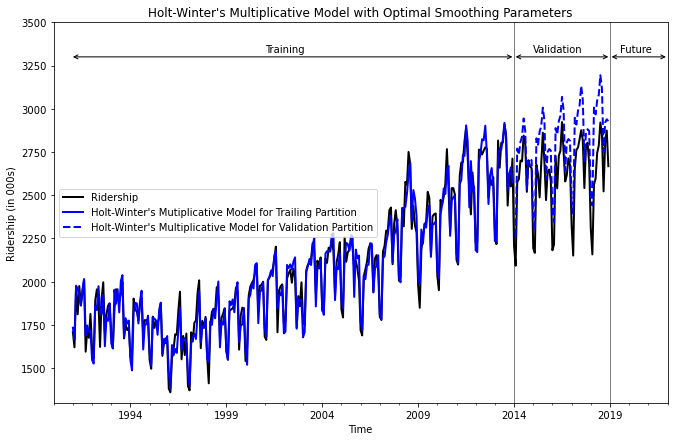

In [35]:
# Plot HW predictions for partitioned data with multiplicative trend and 
# seasonality options, and optimal smoothing parameters.

# Plot Ridership data set.
ax = ridership_ts.plot(color='black', linewidth=2, figsize=(11,7))

# Plot HW fitted values and forecast for training and valiation sets.
hw_AMM.fittedvalues.plot(ax = ax, color="blue", linewidth=2)
hw_AMM_pred.plot(ax = ax, color="blue", style='--', linewidth=2)

# Determine coordinates for drawing vertical lines and horizontal 
# arrows and on the chart.
Graph_Layout_Partition_Data()

# Create legend and title for the chart.
ax.legend(['Ridership', 
           'Holt-Winter\'s Mutiplicative Model for Trailing Partition',
           'Holt-Winter\'s Multiplicative Model for Validation Partition'],
            loc = 'center left')
plt.title('Holt-Winter\'s Multiplicative Model with Optimal Smoothing Parameters')

plt.show()

### Compare accuracy of the three models: SES with alpha=0.2, Holt-Winter's additive model with optimal parameters, and Holt-Winter's mixed model with optimal parameters.

In [33]:
# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common 
# accuracy measures for SES model with alpha=0.2.
print("Accuracy Measures for SES Forecast, Alpha=0.2")
print(Forecast_Accuracy(valid_ts, ses_orig_pred))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy measures
# for HW additive model with optimal parameters.
print(' ')
print("Accuracy Measures for Holt-Winter's Additive Model with Optimal Parameters")
print(Forecast_Accuracy(valid_ts, hw_AAA_pred))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy measures
# for HW multiplicative model with optimal parameters.
print(' ')
print("Accuracy Measures for Holt-Winter's Multiplicative Model with Optimal Parameters")
print(Forecast_Accuracy(valid_ts, hw_AMM_pred))


Accuracy Measures for SES Forecast, Alpha=0.2
{'ME': -40.446, 'RMSE': 218.813, 'MAE': 159.056, 'MPE': -2.304, 'MAPE': 6.513, 'ACF1': 0.456}
 
Accuracy Measures for Holt-Winter's Additive Model with Optimal Parameters
{'ME': -192.441, 'RMSE': 215.753, 'MAE': 192.999, 'MPE': -7.506, 'MAPE': 7.527, 'ACF1': 0.615}
 
Accuracy Measures for Holt-Winter's Multiplicative Model with Optimal Parameters
{'ME': -176.306, 'RMSE': 197.963, 'MAE': 176.636, 'MPE': -6.797, 'MAPE': 6.809, 'ACF1': 0.552}


### Forecast with Holt-Winter's model using entire data set into the future for 12 periods. 

In [43]:
# Create Holt-Winter's (HW) exponential smoothing for 
# full Amtrack data.
# Use ExponentialSmoothing() for additive level (default), 
# additive trend and multiplicative seasonality.
# Use optimal alpha, beta, & gamma to fit HW over the 
# entire data period (no specific parameters defined in 
# the fit() function.)
HW_AAM = ExponentialSmoothing(ridership_ts, 
         trend='add', seasonal='mul', seasonal_periods=12,
         initialization_method='estimated').fit(optimized=True)
# May also apply Box-Cox transformation, use_boxcox=True. 
# It is used to separate the time series into trend, seasonal 
# part, and remainder.

# Show the HW model parameters.
print("Holt-Winter's Model Parameters")
print (HW_AAM.params)

# Displayt HW fitted values for training.
print(' ')
print("Fitted Holt-Winter's Values for Entire Data with Optimal Smoothing Parameters")
print(HW_AAM.fittedvalues)

# Use forecast() function to make predictions using this HW model 
# and validation period (nValid). Show predictions in tabular format.
HW_AAM_pred = round(HW_AAM.forecast(12), 3)
print(' ')
print("Holt-Winter's Forecast for Future 12 Periods with Optimal Smoothing Parameters")
print(HW_AAM_pred)

Holt-Winter's Model Parameters
{'smoothing_level': 0.478269351519007, 'smoothing_trend': 0.024776565835839995, 'smoothing_seasonal': 0.16959558032313118, 'damping_trend': nan, 'initial_level': 1813.1731671246368, 'initial_trend': -0.866662941736113, 'initial_seasons': array([0.95191763, 0.93124265, 1.11473624, 1.11225217, 1.14164694,
       1.09092097, 1.14637824, 1.1868942 , 0.99923136, 1.06429881,
       1.05527614, 1.07450307]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted Holt-Winter's Values for Entire Data with Optimal Smoothing Parameters
Date
1991-01-01    1725.166518
1991-02-01    1679.098805
1991-03-01    1974.430566
1991-04-01    1967.174729
1991-05-01    1938.839703
                 ...     
2018-08-01    2803.152221
2018-09-01    2540.503348
2018-10-01    2671.104485
2018-11-01    2744.674474
2018-12-01    2764.789445
Freq: MS, Length: 336, dtype: float64
 
Holt-Winter's Forecast for Future 12 Periods with Optimal Smoothing Parameters
2019-01-01    23

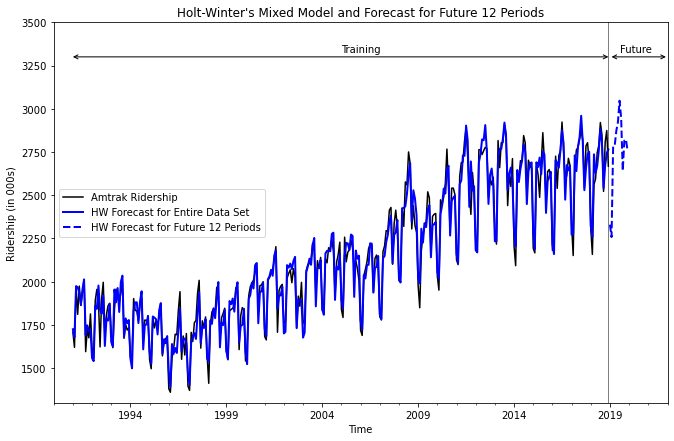

In [49]:
# Plot HW predictions for entire data and future 12 periods 
# with additive trend and multiplicative seasonality options, 
# and optimal smoothing parameters.

# Plot ridership.ts data.
ax = ridership_ts.plot(color='black', linewidth=1.5, figsize=(11,7))

# Plot fitted data and forecast for the HW AMM model for entire
# data set.
HW_AAM.fittedvalues.plot(ax = ax, color="blue", linewidth=2)
HW_AAM_pred.plot(ax = ax, color="blue", style='--', linewidth=2)

# Determine coordinates for drawing vertical lines and horizontal 
# arrows and on the chart.
Graph_Layout_Entire_Data()

# Create legend and title for the chart.
ax.legend(['Amtrak Ridership', 'HW Forecast for Entire Data Set', 
           'HW Forecast for Future 12 Periods'],
           loc = 'center left')
plt.title('Holt-Winter\'s Mixed Model and Forecast for Future 12 Periods')

plt.show()

In [47]:
# Create Holt-Winter's (HW) exponential smoothing for 
# full Amtrack data.
# Use ExponentialSmoothing() for additive level (default), 
# additive trend and seasonality options.
# Use optimal alpha, beta, & gamma to fit HW over the 
# entire data period (no specific parameters defined in 
# the fit() function.)
HW_AAA = ExponentialSmoothing(ridership_ts, 
         trend='add', seasonal='add', seasonal_periods=12,
         initialization_method='estimated').fit(optimized=True)
# May also apply Box-Cox transformation, use_boxcox=True. 
# It is used to separate the time series into trend, seasonal 
# part, and remainder.

# Show the HW model parameters.
print("Holt-Winter's Model Parameters")
print (HW_AAA.params)

# Displayt HW fitted values for training.
print(' ')
print("Fitted Holt-Winter's Values for Entire Data with Optimal Smoothing Parameters")
print(HW_AAA.fittedvalues)

# Use forecast() function to make predictions using this HW model 
# and validation period (nValid). Show predictions in tabular format.
HW_AAA_pred = round(HW_AAA.forecast(12), 3)
print(' ')
print("Holt-Winter's Forecast for Future 12 Periods with Optimal Smoothing Parameters")
print(HW_AAM_pred)

Holt-Winter's Model Parameters
{'smoothing_level': 0.46464285714285714, 'smoothing_trend': 0.02445488721804511, 'smoothing_seasonal': 0.22943877551020408, 'damping_trend': nan, 'initial_level': 1806.790499999999, 'initial_trend': -3.507428030302922, 'initial_seasons': array([-171.78359809, -215.13742101,   82.15332899,   95.94920399,
         78.16457899,  -10.89094184,  113.77657899,  184.00286024,
       -126.57334809,  -21.86867101,  -27.10178559,   19.30921441]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
 
Fitted Holt-Winter's Values for Entire Data with Optimal Smoothing Parameters
Date
1991-01-01    1631.499474
1991-02-01    1621.489402
1991-03-01    1915.722379
1991-04-01    1954.009049
1991-05-01    1866.477434
                 ...     
2018-08-01    2791.733524
2018-09-01    2550.207599
2018-10-01    2673.157677
2018-11-01    2742.199933
2018-12-01    2752.233737
Freq: MS, Length: 336, dtype: float64
 
Holt-Winter's Forecast for Future 12 Periods with Optimal S

In [39]:
# Generate naive and seasonal naive forecasts for entire data set 
# to compare with HW model for entire data set.

# Take the previous value of ridership_ts[:-1] and use it as naive 
# forecast for entire data.
ridership_naive_pred = pd.Series(ridership_ts[:-1].values, 
                        index=ridership_ts[1:].index)
print("Naive Forecast for Entire Data Set")
print(ridership_naive_pred)

# Generate seasonal naive forecast for entire data set. 
# Take 12 previous periods of ridership_ts[:-12] and use it as 
# seasonal naive forecast for entire data.
ridership_snaive_pred = pd.Series(ridership_ts[:-12].values, 
                        index=ridership_ts[12:].index)
print(' ')
print("Seasonal Naive Forecast for Entire Data Set")
print(ridership_snaive_pred)


Naive Forecast for Entire Data Set
Date
1991-02-01    1708.917
1991-03-01    1620.586
1991-04-01    1972.715
1991-05-01    1811.665
1991-06-01    1974.964
                ...   
2018-08-01    2920.412
2018-09-01    2848.935
2018-10-01    2522.367
2018-11-01    2807.200
2018-12-01    2873.968
Freq: MS, Length: 335, dtype: float64
 
Seasonal Naive Forecast for Entire Data Set
Date
1992-01-01    1708.917
1992-02-01    1620.586
1992-03-01    1972.715
1992-04-01    1811.665
1992-05-01    1974.964
                ...   
2018-08-01    2819.838
2018-09-01    2541.622
2018-10-01    2785.149
2018-11-01    2804.107
2018-12-01    2680.541
Freq: MS, Length: 324, dtype: float64


In [48]:
# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy measures
# for HW mixed model with optimal parameters.
print(' ')
print("Accuracy Measures for Holt-Winter's Mixed Model with Optimal Parameterss")
print(Forecast_Accuracy(ridership_ts, HW_AAM.fittedvalues))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy measures
# for HW additive model with optimal parameters.
print(' ')
print("Accuracy Measures for Holt-Winter's Additive Model with Optimal Parameterss")
print(Forecast_Accuracy(ridership_ts, HW_AAA.fittedvalues))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy measures
# for naive forecast in entire data set.
print(' ')
print("       Accuracy Measures for Naive Forecast")
print(Forecast_Accuracy(ridership_ts[1:], ridership_naive_pred))

# Use Forecast_Accuracy(actual, forecast) function 
# defined in this file to identfiy common accuracy measures
# for seasonal naive forecast in entire data set.
print(' ')
print("       Accuracy Measures for Seasonal Naive Forecast")
print(Forecast_Accuracy(ridership_ts[12:], ridership_snaive_pred))


 
Accuracy Measures for Holt-Winter's Mixed Model with Optimal Parameterss
{'ME': 1.32, 'RMSE': 68.725, 'MAE': 54.299, 'MPE': -0.011, 'MAPE': 2.57, 'ACF1': 0.04}
 
Accuracy Measures for Holt-Winter's Additive Model with Optimal Parameterss
{'ME': 1.836, 'RMSE': 71.759, 'MAE': 57.282, 'MPE': -0.022, 'MAPE': 2.716, 'ACF1': 0.088}
 
       Accuracy Measures for Naive Forecast
{'ME': 2.863, 'RMSE': 191.628, 'MAE': 140.037, 'MPE': -0.294, 'MAPE': 6.739, 'ACF1': -0.159}
 
       Accuracy Measures for Seasonal Naive Forecast
{'ME': 31.113, 'RMSE': 116.076, 'MAE': 93.101, 'MPE': 1.26, 'MAPE': 4.375, 'ACF1': 0.631}
